# Telco Customer Churn
Project by Group 1

# Use Case

* **Use Case Summary**


* **Objective Statement** :

    * Get business insight about how many customer who churn or not churn
    * Get business insight about how many female and male in churn or not churn customer
    * Get business insight about how many customer who has a partner, has dependent or not, and old age or not
    * Get business insight about how many customer used additional service like : PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, and Papperless Billing
    * Get business insight about how long customer used service who has churn(Contract)
    * Get business insight about how payment method from customer
    * Get insight about 5 feature or facility that influenced customer to churn most. That is, tenure, monthly charge, contract, gender male, fiber optic
    * Build models using machine learning to predict customer churn
    
    
* **Challanges** :
    * Large size of data, can not maintain by excel spreadsheet
    * Fill in the missing value in the dataset
    * Change the data type of column which doesn't match
    * Hard to know the meaning of each column



* **Methodology / Analytic Technique** :
    * Descriptive analysis
        * Describe the information such as, min/max value of each column, average, and the total count of data contained in each column. We also describe the distribution of the numerical data.
    * Graph analysis
        * Elaborate the relation of each plot/graphic including the data percentage and assumption/hypothesis of its implication.
    * Using Machine Learning Classification
        * Logistic regression


* **Business Benefit**:

    * Gain insight to keep customers from churn through modification of benefits/features provided to these customers
    * Gain insight to improve the quality of company services so that customers remain loyal and gain more profit for the company
    * Build models using machine learning to predict customer churn


* **Expected Outcome**:

    * Know how many customer who churn or not churn
    * Know how many female and male in churn or not churn customer
    * Know how many customer who has a partner, has dependent or not, and old age or not
    * Know how many customer used additional service like : PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, and Papperless Billing
    * Know how long customer used service who has churn(Contract)
    * Know about how payment method from customer
    * Know about 4 feature variable that influenced customer to churn most.
    * Know how to build models using machine learning to predict customer churn

# Business Understanding
* Data telco is a company engaged in telecommunication and internet services. 
- This case has some business question using the data:
    * How many customer who churn or not churn?
    * How many female and male in churn or not churn customer?
    * How how many customer who has a partner, has dependent or not, and old age or not?
    * How how many customer used additional service like : PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, and Papperless Billing
    * How how long customer used service who has churn ? (Contract)
    * How about how payment method from customer?
    * How about 4 feature or facility that influenced customer to churn most. That is, tenure, monthly charge, contract, gender male, fiber optic?
    * How how to build models using machine learning to predict customer churn?

# Data Preparation

* **Code use**:
    * Python 3.9.7
    * Package: Pandas, Numpy, Matplotlib, Seaborn, Sklearn, Warning and Feature Engine


# Data Understanding


* **Source Data**:
    * The dataset used is data from https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset
    * The raw data contains 7043 rows (customers) and 21 columns (features).


* **Data Dictionary** :
    * customerID : Customer ID
    * gender : Whether the customer is a male or a female (Male, Female)
    * SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
    * Partner : Whether the customer has a partner or not (Yes, No)
    * Dependents : Whether the customer has dependents or not (Yes, No)
    * Tenure : Number of months the customer has stayed with the company
    * PhoneService : Whether the customer has a phone service or not (Yes, No)
    * MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
    * InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
    * OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
    * OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
    * DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
    * TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
    * StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
    * Contract : Indicates the customer’s current contract type: (Month-to-Month, One Year, Two Year)
    * Paperless Billing: Indicates if the customer has chosen paperless billing: (Yes, No)
    * Payment Method: Indicates how the customer pays their bill: (Bank Withdrawal, Credit Card, Mailed Check)
    * Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.
    * Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
    * Churn Label: 
        * Yes = the customer left the company
        * No = the customer remained with the company


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, log_loss
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data_telco.csv")
df.head(100)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,NaN,NaN,NaN,1,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,NaN,NaN,NaN,NaN,34,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,NaN,NaN,NaN,NaN,45,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,NaN,NaN,NaN,NaN,12,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,78.95,927.35,Yes
96,9803-FTJCG,NaN,NaN,NaN,NaN,71,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,Yes,Credit card (automatic),66.85,4748.7,No
97,0278-YXOOG,NaN,NaN,NaN,NaN,5,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,No,Mailed check,21.05,113.85,Yes
98,3212-KXOCR,NaN,NaN,NaN,NaN,52,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Two year,No,Bank transfer (automatic),21.00,1107.2,No


# Data Profiling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6034 non-null   object 
 2   SeniorCitizen     6034 non-null   float64
 3   Partner           6034 non-null   object 
 4   Dependents        6034 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     6034 non-null   object 
 8   InternetService   6034 non-null   object 
 9   OnlineSecurity    6034 non-null   object 
 10  OnlineBackup      6034 non-null   object 
 11  DeviceProtection  6034 non-null   object 
 12  TechSupport       6034 non-null   object 
 13  StreamingTV       6034 non-null   object 
 14  StreamingMovies   6034 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.shape

(7043, 21)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,NaN,NaN,NaN,1,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,NaN,NaN,NaN,NaN,34,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,NaN,NaN,NaN,NaN,45,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.isna().sum()

customerID             0
gender              1009
SeniorCitizen       1009
Partner             1009
Dependents          1009
tenure                 0
PhoneService           0
MultipleLines       1009
InternetService     1009
OnlineSecurity      1009
OnlineBackup        1009
DeviceProtection    1009
TechSupport         1009
StreamingTV         1009
StreamingMovies     1009
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

# Data Cleansing

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

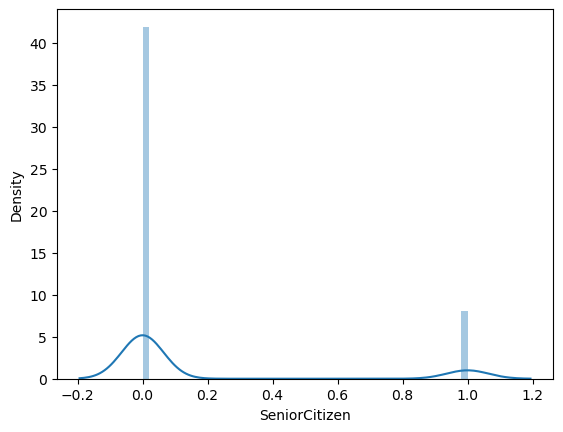

In [7]:
sns.distplot(df["SeniorCitizen"])
#means categorical

In [8]:
df['SeniorCitizen'] = df['SeniorCitizen'].fillna('unknown')
df['gender'] = df['gender'].fillna('unknown')
df['Partner'] = df['Partner'].fillna('unknown')
df['Dependents'] = df['Dependents'].fillna('unknown')
df['MultipleLines'] = df['MultipleLines'].fillna('unknown')
df['InternetService'] = df['InternetService'].fillna('unknown')
df['OnlineSecurity'] = df['OnlineSecurity'].fillna('unknown')
df['OnlineBackup'] = df['OnlineBackup'].fillna('unknown')
df['DeviceProtection'] = df['DeviceProtection'].fillna('unknown')
df['TechSupport'] = df['TechSupport'].fillna('unknown')
df['StreamingTV'] = df['StreamingTV'].fillna('unknown')
df['StreamingMovies'] = df['StreamingMovies'].fillna('unknown')

In [9]:
np.sum(df.isna())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# EDA

In [12]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


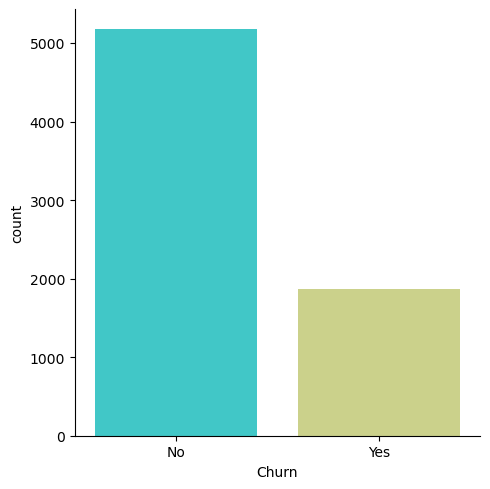

In [13]:
#Bar Chart
sns.catplot(x="Churn",kind="count",palette="rainbow",data=df)

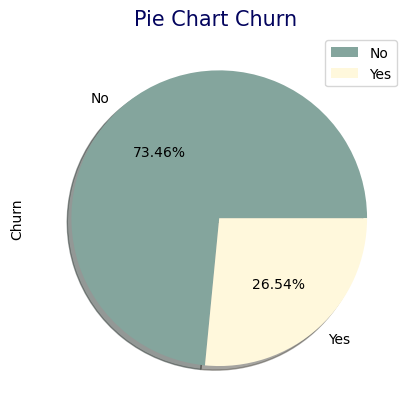

In [14]:
#Pie Chart
colors = ('#84a59d', '#FFF8DC', '#b08968')
Type=df['Churn'].value_counts()
Type.plot.pie(autopct='%.2f%%',shadow=True, colors=colors,legend=True)
plt.title('Pie Chart Churn ', fontsize=15, color="#03045e")

plt.show()

The bar chart above shows the number of customers who did not leave/stop telco services (No churn) more than customers who left/stopped telco services (Yes churn). Likewise, in the pie chart above, it can be seen that customers who do not Churn are 73.46% and customers who Churn are 26.54%. This might happen because the company provides discounts or rebates to customers, so there are still many customers who do not leave/unsubscribe.

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

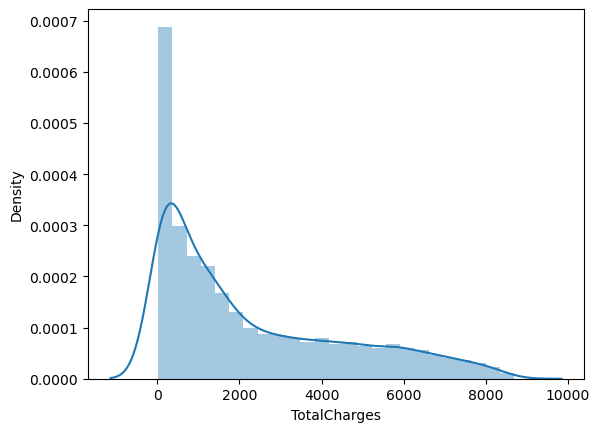

In [15]:
sns.distplot(df["TotalCharges"])

<AxesSubplot:xlabel='tenure', ylabel='Density'>

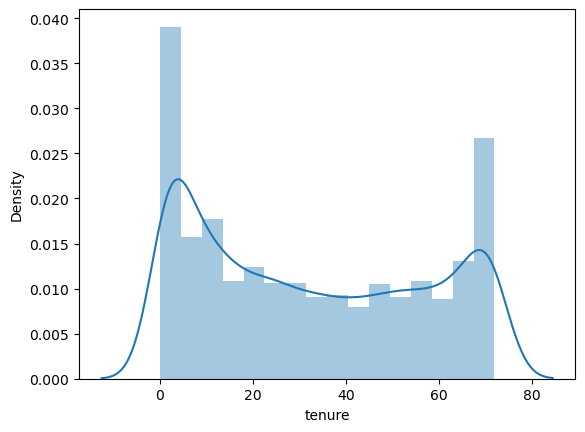

In [16]:
sns.distplot(df["tenure"])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

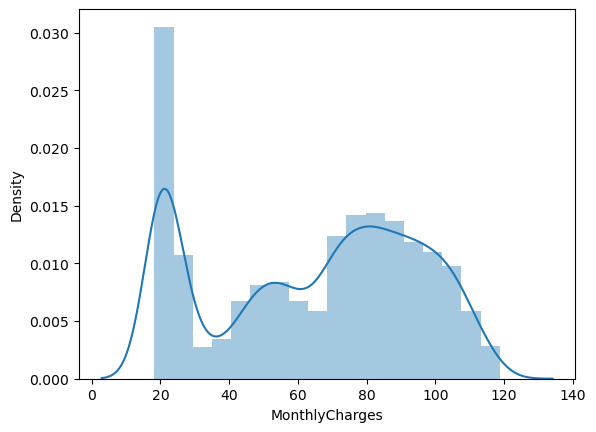

In [17]:
sns.distplot(df["MonthlyCharges"])

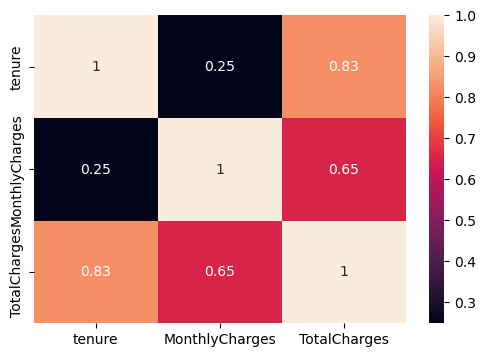

In [18]:
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(),annot=True);

Based on the correlation plot above, it can be seen that the correlation value between Tenure and Total Charges is high at 0.83 and the correlation between Monthly Charges and Total Charges is quite high at 0.65. This can indicate the existence of multicollinearity between Tenure with Total Charges and Monthly Charges with Total Charges. So it is necessary to eliminate variables on one of these variables. Here the variable selected to be deleted is the Total Charges variable.

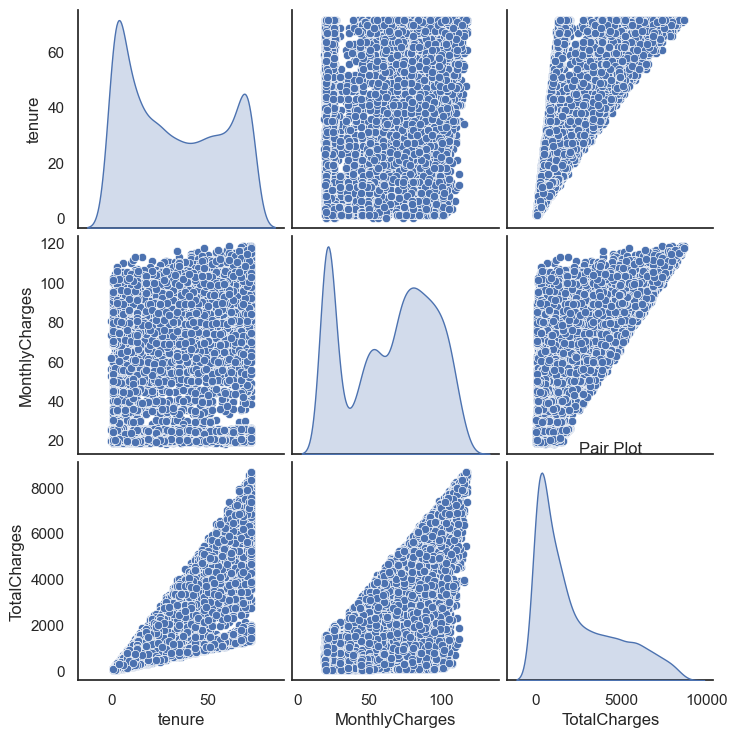

In [19]:
#Pair Plot
sns.set(style='white')
sns.pairplot(df,palette="cubehelix",diag_kind = 'kde')
plt.title('Pair Plot')
plt.show()

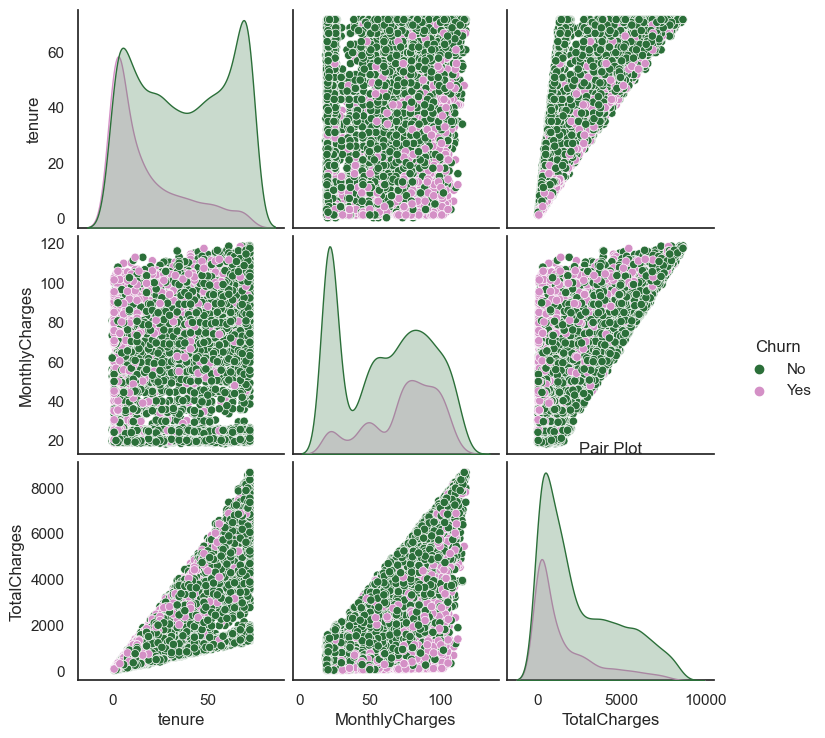

In [20]:
#Pair Plot
sns.set(style='white')
sns.pairplot(df, hue='Churn',palette="cubehelix")
plt.title('Pair Plot')
plt.show()

From the pair plot above, it can be seen that the distribution of Monthly Charges, Total Charges, and Tenure is not normal. For distribution, Tenure and Monthly Charges tend to be bimodal because they have 2 peaks. and for Total Charges the distribution is skewed to the right so that the distribution of data is mostly on the left (between the range 0-5000). And if the distribution is divided by Churn category, it can still be seen that the data is not normally distributed.

## Churn Vs Gender

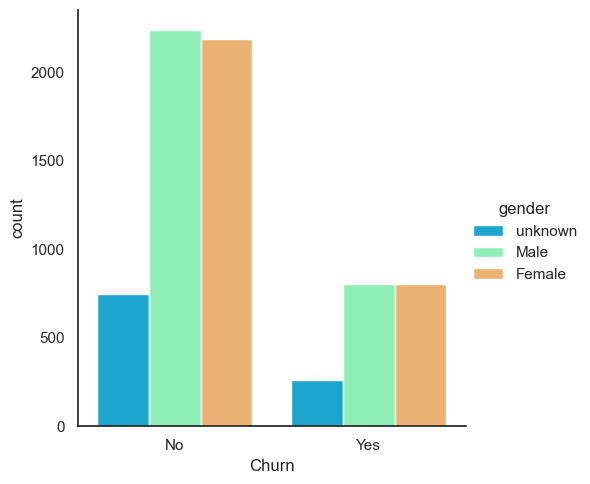

In [21]:
sns.catplot(x="Churn",kind="count",hue="gender",palette="rainbow",data=df)

In [22]:
pd.crosstab(df['Churn'], df['gender'])

gender,Female,Male,unknown
Churn,,,
No,2187,2239,748
Yes,806,802,261


In [30]:
# Churn No
Female = 2187
Male = 2239
Unknown = 748
Churn = Female + Male + Unknown
F_Churn = Female / Churn * 100
M_Churn = Male / Churn * 100
U_Churn = Unknown / Churn * 100

print(f"di Churn No vs gender")

print(f"of total {Churn} customers, female percentage is {F_Churn}")
print(f"of total {Churn} customers, male percentage is {M_Churn}")
print(f"of total {Churn} customers, the percentage of unknown is {U_Churn}")
total = F_Churn + M_Churn + U_Churn
print(total)

di Churn No vs gender
of total 5174 customers, female percentage is 42.26903749516815
of total 5174 customers, male percentage is 43.274062620796286
of total 5174 customers, the percentage of unknown is 14.456899884035563
100.0


In [29]:
# Churn Yes
Female = 806
Male = 802
Unknown = 261
Churn = Female + Male + Unknown
F_Churn = Female / Churn * 100
M_Churn = Male / Churn * 100
U_Churn = Unknown / Churn * 100

print(f"di Churn Yes vs gender")

print(f"of total {Churn} customers, female percentage is {F_Churn}")
print(f"of total {Churn} customers, male percentage is {M_Churn}")
print(f"of total {Churn} customers, the percentage of unknown is {U_Churn}")
total = F_Churn + M_Churn + U_Churn
print(total)

di Churn Yes vs gender
of total 1869 customers, female percentage is 43.12466559657571
of total 1869 customers, male percentage is 42.91064740502943
of total 1869 customers, the percentage of unknown is 13.964686998394862
100.00000000000001


From Column **Churn vs gender**

**Churn no** = out of a total of 5174, female 42% | male 43% | unknown 14%

**Churn yes** = from a total of 1869, female 43% | male 42% | Unknown 13%

From gender, it looks balanced because maybe the times are developing, there are many female and male streamers and many context creators on social media

_____________

## Churn vs Senior Citizen

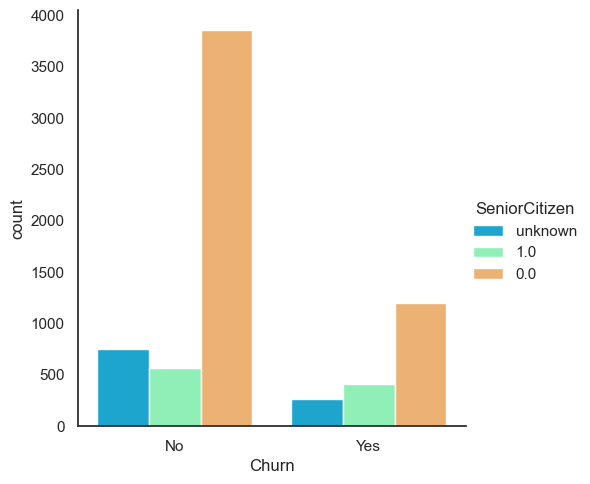

In [25]:
sns.catplot(x="Churn",kind="count",hue="SeniorCitizen",palette="rainbow",data=df)

In [26]:
pd.crosstab(df['Churn'], df['SeniorCitizen'])

SeniorCitizen,0.0,1.0,unknown
Churn,,,
No,3860,566,748
Yes,1197,411,261


In [3]:
# Churn No
muda0 = 3860
tua1 = 566
Unknown = 748
Churn = muda0 + tua1 + Unknown
m_Churn = muda0 / Churn * 100
t_Churn = tua1 / Churn * 100
U_Churn = Unknown / Churn * 100

print(f"di Churn No vs SeniorCitizen")

print(f"of total {Churn} customers, young percentage is {m_Churn}")
print(f"of total {Churn} customers, the percentage of elderly is {t_Churn}")
print(f"of total {Churn} customers, the percentage of unknown is {U_Churn}")
total = m_Churn + t_Churn + U_Churn
print(total)

di Churn No vs SeniorCitizen
of total 5174 customers, young percentage is 74.60378817162737
of total 5174 customers, the percentage of elderly is 10.939311944337069
of total 5174 customers, the percentage of unknown is 14.456899884035563
100.0


In [4]:
# Churn Yes 
muda0 = 1197
tua1 = 411
Unknown = 261
Churn = muda0 + tua1 + Unknown
m_Churn = muda0 / Churn * 100
t_Churn = tua1 / Churn * 100
U_Churn = Unknown / Churn * 100

print(f"di Churn Yes vs SeniorCitizen")

print(f"of total {Churn} customers, young percentage is {m_Churn}")
print(f"of total {Churn} customers, the percentage of elderly is {t_Churn}")
print(f"of total {Churn} customers, the percentage of unknown is {U_Churn}")
total = m_Churn + t_Churn + U_Churn
print(total)

di Churn Yes vs SeniorCitizen
of total 1869 customers, young percentage is 64.04494382022472
of total 1869 customers, the percentage of elderly is 21.990369181380416
of total 1869 customers, the percentage of unknown is 13.964686998394862
100.0


From Column **Churn vs SeniorCitizen**

**Churn no** = from a total of 5174, not old age 74% | elderly 10% | unknown 14%

**Churn yes** = from a total of 1869, not old age 64% | elderly 21% | Unknown 13%

From the data, both Churn and not, the elderly users are few. because also at this age we think many are 'technical' and can't keep up with the times, so if we give a discount for the elderly it will be in vain

__________________

## Churn vs Partner

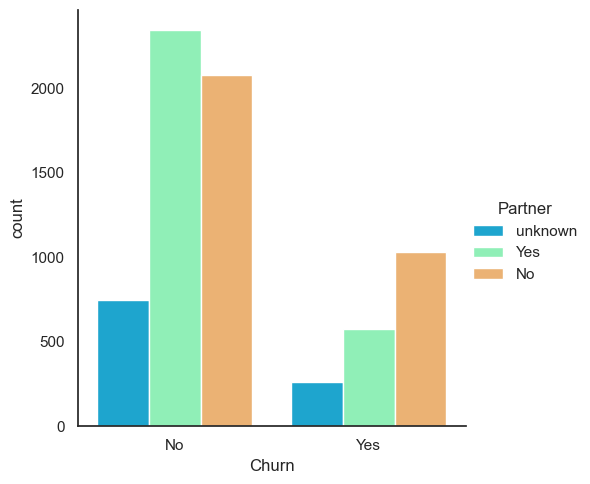

In [29]:
sns.catplot(x="Churn",kind="count",hue="Partner",palette="rainbow",data=df)

In [30]:
pd.crosstab(df['Churn'], df['Partner'])

Partner,No,Yes,unknown
Churn,,,
No,2079,2347,748
Yes,1032,576,261


In [5]:
# Churn No
No = 2079
Yes = 2347
Unknown = 748
Churn = No + Yes + Unknown
n_Churn = No / Churn * 100
y_Churn = Yes / Churn * 100
U_Churn = Unknown / Churn * 100

print(f"di Churn No vs Partner")

print(f"of total {Churn} customers, the percentage of not having a partner is {n_Churn}")
print(f"of total {Churn} customers, the percentage of having a partner is {y_Churn}")
print(f"of total {Churn} customers, the percentage of unknown is {U_Churn}")
total = n_Churn + y_Churn + U_Churn
print(total)

di Churn No vs Partner
of total 5174 customers, the percentage of not having a partner is 40.181677618863546
of total 5174 customers, the percentage of having a partner is 45.36142249710089
of total 5174 customers, the percentage of unknown is 14.456899884035563
100.0


In [6]:
# Churn Yes
No = 1032
Yes = 576
Unknown = 261
Churn = No + Yes + Unknown
n_Churn = No / Churn * 100
y_Churn = Yes / Churn * 100
U_Churn = Unknown / Churn * 100

print(f"di Churn Yes vs Partner")

print(f"of total {Churn} customers, the percentage of not having a partner is {n_Churn}")
print(f"of total {Churn} customers, the percentage of having a partner is {y_Churn}")
print(f"of total {Churn} customers, the percentage of unknown is {U_Churn}")
total = n_Churn + y_Churn + U_Churn
print(total)

di Churn Yes vs Partner
of total 1869 customers, the percentage of not having a partner is 55.21669341894061
of total 1869 customers, the percentage of having a partner is 30.818619582664525
of total 1869 customers, the percentage of unknown is 13.964686998394862
100.0


From Column **Churn vs Partner**

**Churn no** = 5174 customer, no partner 40% | have a partner 45% | unknown 14%

**Churn yes** = 1869 customer, no partner 55% | have a partner 30% | unknown 13%

why does not Churn have more partners, here we suspect that the customer is married and has a family so that the economy is quite stable.


In the churn section, we think that we are still young people who are still in the stage of managing their finances and still leaving the house more often, so they prefer to use cellular internet services.

______________________________

## Churn vs Dependent

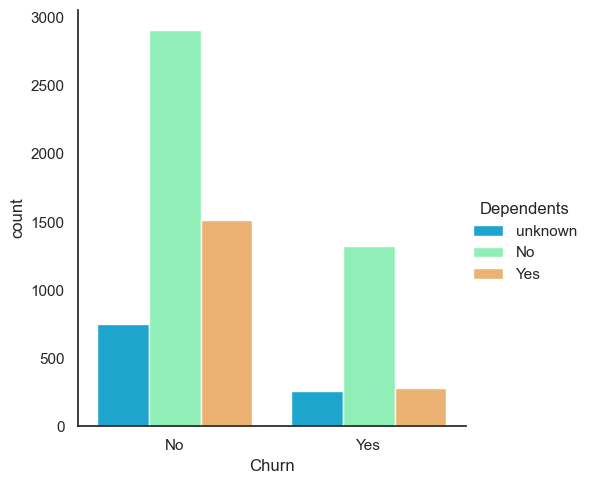

In [33]:
sns.catplot(x="Churn",kind="count",hue="Dependents",palette="rainbow",data=df)

In [34]:
pd.crosstab(df['Churn'], df['Dependents'])

Dependents,No,Yes,unknown
Churn,,,
No,2912,1514,748
Yes,1326,282,261


In [7]:
# Churn No
No = 2912
Yes = 1514
Unknown = 748
Churn = No + Yes + Unknown
n_Churn = No / Churn * 100
y_Churn = Yes / Churn * 100
U_Churn = Unknown / Churn * 100

print(f"di Churn No vs Partner")

print(f"of total {Churn} customers, the percentage of no dependents is {n_Churn}")
print(f"of total {Churn} customers, the percentage has a dependent of {y_Churn}")
print(f"of total {Churn} customers, the percentage of unknown is {U_Churn}")
total = n_Churn + y_Churn + U_Churn
print(total)

di Churn No vs Partner
of total 5174 customers, the percentage of no dependents is 56.28140703517588
of total 5174 customers, the percentage has a dependent of 29.261693080788557
of total 5174 customers, the percentage of unknown is 14.456899884035563
100.0


In [8]:
# Churn Yes
No = 1326
Yes = 282
Unknown = 261
Churn = No + Yes + Unknown
n_Churn = No / Churn * 100
y_Churn = Yes / Churn * 100
U_Churn = Unknown / Churn * 100

print(f"di Churn Yes vs Partner")

print(f"of total {Churn} customers, the percentage of no dependents is {n_Churn}")
print(f"of total {Churn} customers, the percentage has a dependent of {y_Churn}")
print(f"of total {Churn} customers, the percentage of unknown is {U_Churn}")
total = n_Churn + y_Churn + U_Churn
print(total)

di Churn Yes vs Partner
of total 1869 customers, the percentage of no dependents is 70.9470304975923
of total 1869 customers, the percentage has a dependent of 15.08828250401284
of total 1869 customers, the percentage of unknown is 13.964686998394862
100.0


From Column **Churn vs Dependent**

**Churn no** = 5174 customers, no dependents 56% | have dependents 29% | unknown 14%

**Churn yes** = 1869 customer, no dependents 70% | have a dependent 15% | unknown 13%

whether churn or not, have no dependents. because maybe many customers are not from the rich who have a lot of insurance

___________________________________________________________________________________________________________

## Churn vs PhoneService

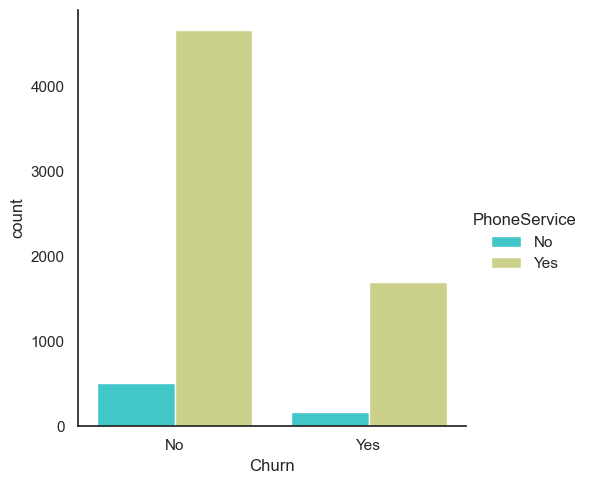

In [37]:
sns.catplot(x="Churn",kind="count",hue="PhoneService",palette="rainbow",data=df)

In [38]:
pd.crosstab(df['Churn'], df['PhoneService'])

PhoneService,No,Yes
Churn,,
No,512,4662
Yes,170,1699


In [9]:
# Churn No
No = 512
Yes = 4662
Churn_No = No + Yes
n_Churn = No / Churn_No * 100
y_Churn = Yes / Churn_No * 100

print(f"di Churn No vs Phone Service")

print(f"of total {Churn_No} customer, percentage not subscribed to Phone Service {n_Churn}%")
print(f"of total {Churn_No} customer, percentage of phone service subscription {y_Churn}%")
total = n_Churn + y_Churn 
print(total,'%')

di Churn No vs Phone Service
of total 5174 customer, percentage not subscribed to Phone Service 9.89563200618477%
of total 5174 customer, percentage of phone service subscription 90.10436799381523%
100.0 %


In [10]:
# Churn Yes
No = 170
Yes = 1699
Churn_Yes = No + Yes 
n_Churn = No / Churn_Yes * 100
y_Churn = Yes / Churn_Yes * 100


print(f"di Churn Yes vs PhoneService")

print(f"of total {Churn_No} customer, percentage not subscribed to Phone Service {n_Churn}%")
print(f"of total {Churn_No} customer, percentage of phone service subscription {y_Churn}%")
total = n_Churn + y_Churn 
print(total,'%')

di Churn Yes vs PhoneService
of total 5174 customer, percentage not subscribed to Phone Service 9.095773140716961%
of total 5174 customer, percentage of phone service subscription 90.90422685928304%
100.0 %


From Column **Churn vs PhoneService**

**Churn no** = from a total of 5174, use Phone Service 90% | do not use Phone Service 10%

**Churn yes** = from a total of 1869, use Phone Service 91% | not use Phone Service 9%

In our opinion, the Phone Service service is quite good, as evidenced by approximately 90% of customers who have Churn No or yes. In the future, in our opinion, it is better for customers who have churn yes and phone service yes so that discounts are given so that they can subscribe again (Churn == No)

______________________________________

## Churn vs MultipleLines

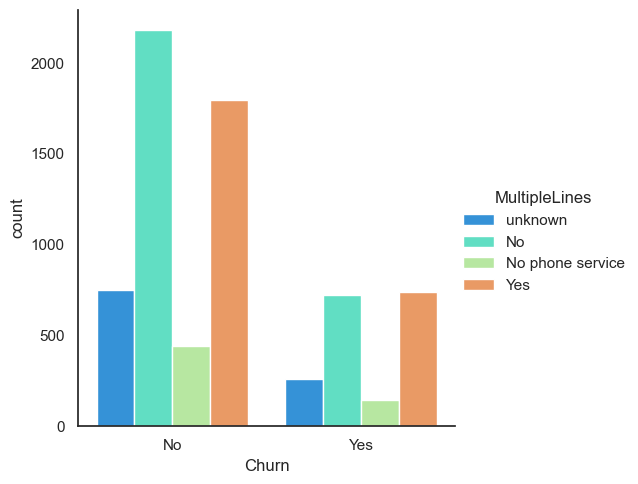

In [41]:
sns.catplot(x="Churn",kind="count",hue="MultipleLines",palette="rainbow",data=df)

In [42]:
pd.crosstab(df['Churn'], df['MultipleLines'])

MultipleLines,No,No phone service,Yes,unknown
Churn,,,,
No,2184,442,1800,748
Yes,724,147,737,261


In [11]:
# Churn No
No = 2184
No_phone_service = 442
Yes = 1800
Unknown = 748
Churn_No = No + Yes + Unknown + No_phone_service
n_Churn = No / Churn_No * 100
y_Churn = Yes / Churn_No * 100
U_Churn = Unknown / Churn_No * 100
No_phone_Churn = No_phone_service / Churn_No * 100

print(f"di Churn No vs Multiple Lines")

print(f"of total {Churn_No} customer, percentage not subscribed to Multiple Lines {n_Churn}%")
print(f"of total {Churn_No} customer, the percentage of not having phone service is {No_phone_Churn}%")
print(f"of total {Churn_No} customer, Multiple Lines subscription percentage {y_Churn}%")
print(f"of total {Churn_No} customers, unknown percentage is {U_Churn}%")
total = n_Churn + y_Churn + U_Churn + No_phone_Churn
print(total,'%')

di Churn No vs Multiple Lines
of total 5174 customer, percentage not subscribed to Multiple Lines 42.211055276381906%
of total 5174 customer, the percentage of not having phone service is 8.542713567839195%
of total 5174 customer, Multiple Lines subscription percentage 34.789331271743336%
of total 5174 customers, unknown percentage is 14.456899884035563%
100.00000000000001 %


In [12]:
# Churn Yes
No = 724
No_phone_service = 147
Yes = 737
Unknown = 261
Churn_Yes = No + Yes + Unknown + No_phone_service
n_Churn = No / Churn_Yes * 100
y_Churn = Yes / Churn_Yes * 100
U_Churn = Unknown / Churn_Yes * 100
No_phone_Churn = No_phone_service / Churn_Yes * 100

print(f"di Churn No vs Multiple Lines")

print(f"of total {Churn_No} customer, percentage not subscribed to Multiple Lines {n_Churn}%")
print(f"of total {Churn_No} customer, the percentage of not having phone service is {No_phone_Churn}%")
print(f"of total {Churn_No} customer, Multiple Lines subscription percentage {y_Churn}%")
print(f"of total {Churn_No} customers, unknown percentage is {U_Churn}%")
total = n_Churn + y_Churn + U_Churn + No_phone_Churn
print(total,'%')

di Churn No vs Multiple Lines
of total 5174 customer, percentage not subscribed to Multiple Lines 38.737292669876936%
of total 5174 customer, the percentage of not having phone service is 7.865168539325842%
of total 5174 customer, Multiple Lines subscription percentage 39.43285179240236%
of total 5174 customers, unknown percentage is 13.964686998394862%
100.0 %


From Column **Churn vs Multiple Lines**

**Churn no** = from a total of 5174, subscribe to Multiple Lines 35% | not subscribed to Multiple Lines 42% | do not have phone service by 9%

customers whose data is unknown 14%

**Churn yes** = from a total of 1869, subscribed to Multiple Lines 39% | not subscribed to Multiple Lines 39% | do not have phone service by 8% | customers whose data is unknown 14%

Both churn and no churn, most do not use Multiple Lines. Our suggestion is that multiple lines are promoted by the company because they are used more. For individual customers rarely use it.

_____________________________________

## Churn vs InternetService

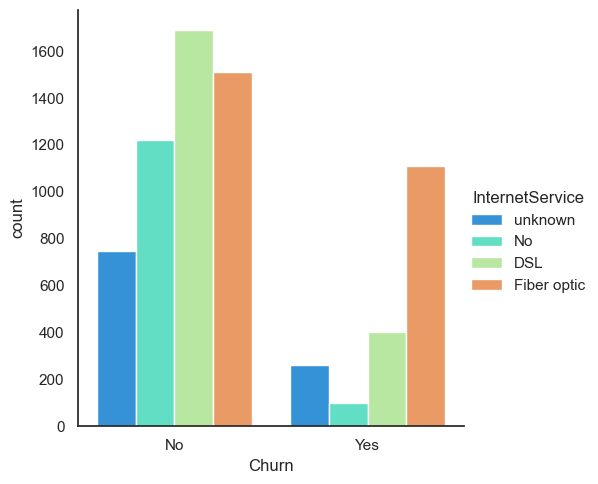

In [45]:
sns.catplot(x="Churn",kind="count",hue="InternetService",palette="rainbow",data=df)

In [46]:
pd.crosstab(df['Churn'], df['InternetService'])

InternetService,DSL,Fiber optic,No,unknown
Churn,,,,
No,1691,1512,1223,748
Yes,401,1109,98,261


In [13]:
# Churn No
DSL = 1691
FiberOptic = 1512
No = 1223
Unknown = 748
Churn_No = DSL + FiberOptic + No + Unknown

DSL_Churn = DSL / Churn_No * 100
FiberOptic_Churn = FiberOptic / Churn_No * 100
No_Churn = No / Churn_No * 100
Unknown_Churn = Unknown / Churn_No * 100


print(f"in Churn No vs Internet Service")

print(f"of total {Churn_No} customers, percentage of Internet Service subscriptions with DSL {DSL_Churn}%")
print(f"of total {Churn_No} customers, percentage of Internet Service subscriptions with Fiber Optic {FiberOptic_Churn}%")
print(f"of total {Churn_No} customers, percentage not subscribed to Internet Service {No_Churn}%")
print(f"from total {Churn_No} customers, the percentage of unknowns is {Unknown_Churn}%")
total = DSL_Churn + FiberOptic_Churn + No_Churn + Unknown_Churn
print(total,'%')

in Churn No vs Internet Service
of total 5174 customers, percentage of Internet Service subscriptions with DSL 32.682643989176654%
of total 5174 customers, percentage of Internet Service subscriptions with Fiber Optic 29.2230382682644%
of total 5174 customers, percentage not subscribed to Internet Service 23.637417858523385%
from total 5174 customers, the percentage of unknowns is 14.456899884035563%
100.00000000000001 %


In [14]:
# Churn Yes
DSL = 401
FiberOptic = 1109
No = 98
Unknown = 261
Churn_Yes = DSL + FiberOptic + No + Unknown

DSL_Churn = DSL / Churn_Yes * 100
FiberOptic_Churn = FiberOptic / Churn_Yes * 100
No_Churn = No / Churn_Yes * 100
Unknown_Churn = Unknown / Churn_Yes * 100


print(f"di Churn Yes vs Internet Service")

print(f"of total {Churn_No} customers, percentage of Internet Service subscriptions with DSL {DSL_Churn}%")
print(f"of total {Churn_No} customers, percentage of Internet Service subscriptions with Fiber Optic {FiberOptic_Churn}%")
print(f"of total {Churn_No} customers, percentage not subscribed to Internet Service {No_Churn}%")
print(f"from total {Churn_No} customers, the percentage of unknowns is {Unknown_Churn}%")
total = DSL_Churn + FiberOptic_Churn + No_Churn + Unknown_Churn
print(total,'%')

di Churn Yes vs Internet Service
of total 5174 customers, percentage of Internet Service subscriptions with DSL 21.455323702514715%
of total 5174 customers, percentage of Internet Service subscriptions with Fiber Optic 59.336543606206526%
of total 5174 customers, percentage not subscribed to Internet Service 5.2434456928838955%
from total 5174 customers, the percentage of unknowns is 13.964686998394862%
100.0 %


From Column **Churn vs Internet Service**

**Churn no** = out of a total of 5174, 33% DSL subscription | Fiber Optic subscription 29 % | do not subscribe to internet service by 24% | Unknown data 14%

**Churn yes** = from a total of 1869, 22% DSL subscription | 59% Fiber Optic subscription | don't subscribe to internet service by 5% | Unknown data 14%

* In our opinion, DSL service is a superior service, as seen from the data churn No with the largest percentage, namely DSL at 33%.
* In our opinion, Fiber Optic service is a service that is not good, this can be seen from the churn value of yes (leaving our service) of 59%. So, every customer who leaves our service (Churn == Yes) has used Fiber Optic and Fiber Optic has the greatest value.
* Fiber Optic costs may be more expensive than DSL, so it seems that customers prefer to use DSL services

_____________

## Churn vs OnlineSecurity

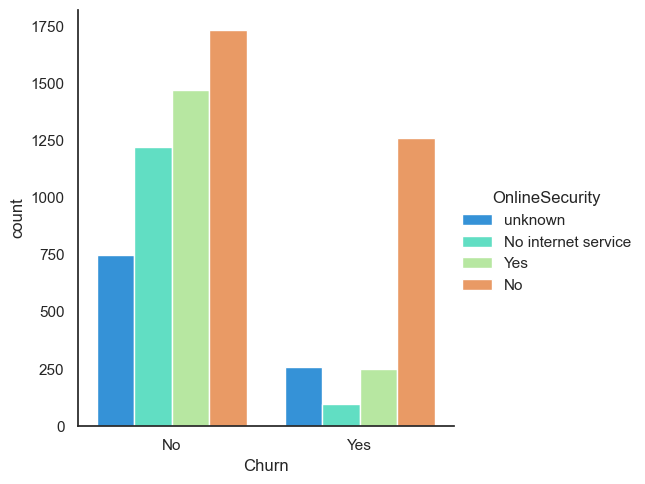

In [49]:
sns.catplot(x="Churn",kind="count",hue="OnlineSecurity",palette="rainbow",data=df)

In [50]:
pd.crosstab(df['Churn'], df['OnlineSecurity'])

OnlineSecurity,No,No internet service,Yes,unknown
Churn,,,,
No,1734,1223,1469,748
Yes,1259,98,251,261


Whether the customer has online security or not (Yes, No, No internet service)

seen from the data, more people don't use online security

* OnlineSecurity based on Churn there are various kinds of customers, namely (Yes: Subscribe to OnlineSecurity; No: No subscription; No internet service; Unknown: Data is empty)

* Of the 5174 customers with Churn No, 33.5% of customers do not subscribe to Online Backup. Maybe they don't know about the Online Backup feature. as many as 23.6% do not have an internet connection. A total of 28.3% subscribed and 14.4% unknown status.

* From 1869 customers whose Churn is Yes, as many as 67.3% of customers do not subscribe to Online Backup. Maybe they don't know about the Online Backup feature. as much as 5.2% do not have an internet connection. A total of 13.4% subscribed and 13.9% unknown status.

From Churn's data, it turns out that many do not use the OnlineSecurity service, so we think these customers have experienced phishing, annoying pop up ads, etc. so it is not comfortable to surf the internet

**Our advice is to re-socialize about Online Security considering that data security is important.**

_________________

## Churn vs OnlineBackup

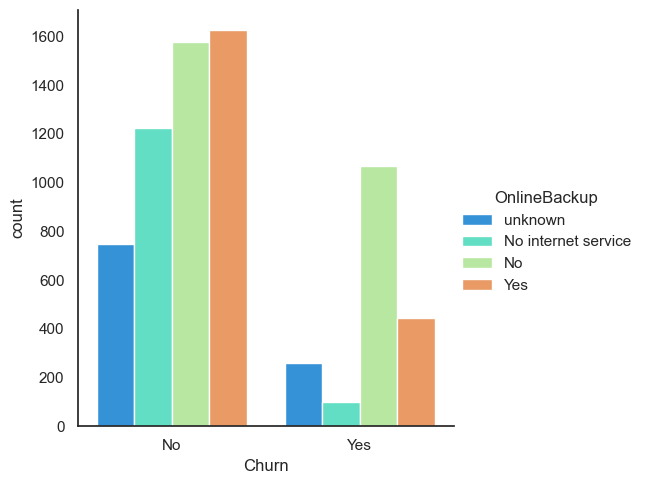

In [51]:
sns.catplot(x="Churn",kind="count",hue="OnlineBackup",palette="rainbow",data=df)

In [52]:
pd.crosstab(df['Churn'], df['OnlineBackup'])

OnlineBackup,No,No internet service,Yes,unknown
Churn,,,,
No,1576,1223,1627,748
Yes,1067,98,443,261


* Online backup based on Churn, does customer have online backup or not? (Yes, No, No internet service,Unknown)

* Judging from the data, more people use Online Backup for customers whose Churn is Yes, maybe customers whose Churn is Yes, most likely he has never tried the online backup feature. Because as many as 57% of 1869 customers of those whose Churn is Yes have not subscribed to Online Backup

* OnlineBackup based on Churn there are various kinds of customers, namely (Yes: Subscribe to Online Backup; No: No subscription; No internet service; Unknown: The data is empty)

* Out of 5174 customers with Churn No, as many as 30.45% of customers do not subscribe to Online Backup. Maybe they don't know about the Online Backup feature. as many as 23.6% do not have an internet connection. As many as 31.4% subscribed and 14.4% unknown status.

* From 1869 customers whose Churn is Yes, as many as 57% of customers do not subscribe to Online Backup. Maybe they don't know the Online Backup feature. as much as 5.2% do not have an internet connection. A total of 23.7% subscribed and 13.4% unknown status.

From the data not Churn, many use OnlineBackup, I think customers are satisfied with the OnlineBackUp service

from Churn data, many customers do not use Online Backup service, our suggestion is to socialize this Online Backup service, besides being able to back up data, Telco Data can make customers believe that Online Backup service is good

____________________

## Churn vs DeviceProtection

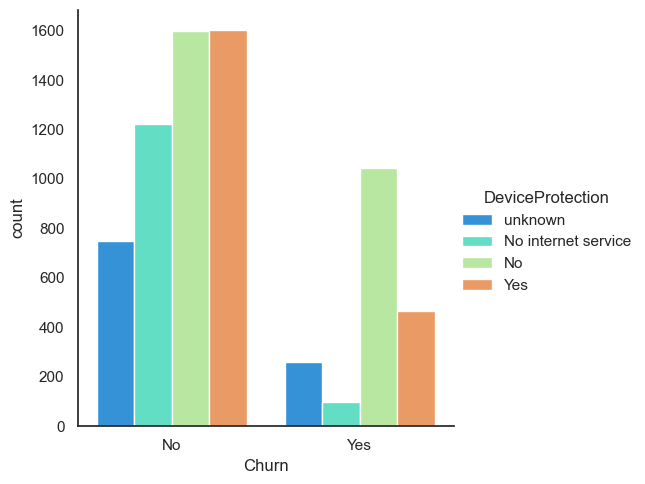

In [53]:
sns.catplot(x="Churn",kind="count",hue="DeviceProtection",palette="rainbow",data=df)

In [54]:
pd.crosstab(df['Churn'], df['DeviceProtection'])

DeviceProtection,No,No internet service,Yes,unknown
Churn,,,,
No,1600,1223,1603,748
Yes,1043,98,467,261


* DeviceProtection based on Churn there are various kinds of customers, namely (Yes: Subscribe to Device Protection; No: No Device Protection subscription; No internet service; Unknown: Data is empty)

* Based on Churn No (Customers who are still subscribed to telco). For Churn No customers, who are still subscribed to Device Protection, the number is almost the same as those who are not subscribed to Device Protection.

* Of the 1869 customers whose Churn is Yes, as many as 55% of customers have not performed Device Protection. It is possible that they do not know the device protection feature

* DeviceProtection based on Churn there are various kinds of customers, namely (Yes: Subscribe to Device Protection; No: No Device Protection subscription; No internet service; Unknown: Data is empty)

* Of the 5174 customers with Churn No, as many as 30.9% of customers do not subscribe to Device Protection. Maybe they don't know about the device protection feature. as many as 23.6% do not have an internet connection. A total of 30.9% subscribed and 14.4% unknown status.

* Of the 1869 customers whose Churn is Yes, as many as 55% of customers do not subscribe to Device Protection. Maybe they don't know about the device protection feature. as much as 5.2% do not have an internet connection. A total of 24.9% subscribed and 13% unknown status.

_______________

## Churn vs TechSupport

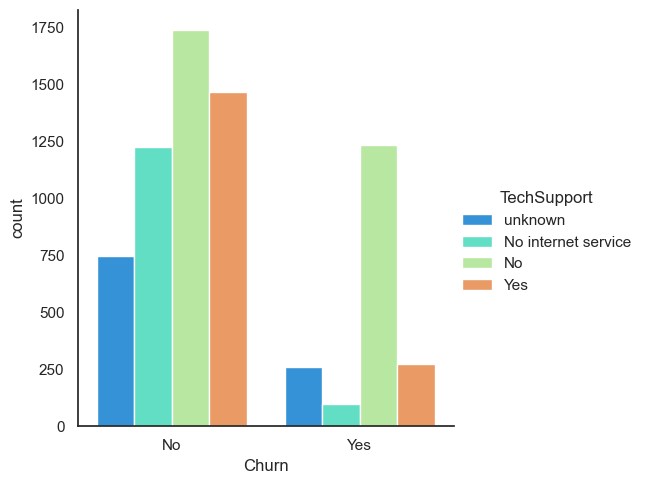

In [55]:
sns.catplot(x="Churn",kind="count",hue="TechSupport",palette="rainbow",data=df)

In [56]:
pd.crosstab(df['Churn'], df['TechSupport'])

TechSupport,No,No internet service,Yes,unknown
Churn,,,,
No,1738,1223,1465,748
Yes,1235,98,275,261


In [15]:
# Churn No
No = 1738
No_internet = 1223
Yes = 1465
Unknown = 748
Churn_No = No + Yes + Unknown + No_internet
n_Churn = No / Churn_No * 100
y_Churn = Yes / Churn_No * 100
U_Churn = Unknown / Churn_No * 100
No_int_Churn = No_internet / Churn_No * 100

print(f"di Churn No vs TechSupport")

print(f"from total {Churn_No} customers, percentage not subscribed to tech support {n_Churn}%")
print(f"of the total {Churn_No} customers, the percentage of not having internet service is {No_int_Churn}%")
print(f"from total {Churn_No} customers, tech support subscription percentage {y_Churn}%")
print(f"out of the total {Churn_No} customers, the percentage of unknowns is {U_Churn}%")
total = n_Churn + y_Churn + U_Churn + No_int_Churn
print(total,'%')

di Churn No vs TechSupport
from total 5174 customers, percentage not subscribed to tech support 33.59103208349439%
of the total 5174 customers, the percentage of not having internet service is 23.637417858523385%
from total 5174 customers, tech support subscription percentage 28.314650173946653%
out of the total 5174 customers, the percentage of unknowns is 14.456899884035563%
100.0 %


In [16]:
# Churn Yes
No = 1235
No_internet = 98
Yes = 275
Unknown = 261
Churn_Yes = No + Yes + Unknown + No_internet
n_Churn = No / Churn_Yes * 100
y_Churn = Yes / Churn_Yes * 100
U_Churn = Unknown / Churn_Yes * 100
No_int_Churn = No_internet / Churn_Yes * 100

print(f"di Churn Yes vs TechSupport")

print(f"from total {Churn_No} customers, percentage not subscribed to tech support {n_Churn}%")
print(f"of the total {Churn_No} customers, the percentage of not having internet service is {No_int_Churn}%")
print(f"from total {Churn_No} customers, tech support subscription percentage {y_Churn}%")
print(f"out of the total {Churn_No} customers, the percentage of unknowns is {U_Churn}%")
total = n_Churn + y_Churn + U_Churn + No_int_Churn
print(total,'%')

di Churn Yes vs TechSupport
from total 5174 customers, percentage not subscribed to tech support 66.0781166399144%
of the total 5174 customers, the percentage of not having internet service is 5.2434456928838955%
from total 5174 customers, tech support subscription percentage 14.71375066880685%
out of the total 5174 customers, the percentage of unknowns is 13.964686998394862%
100.00000000000001 %


* Tech Support based on Churn there are various kinds of customers, namely (Yes: Subscribe to Tech Support; No: No subscribe to Tech Support; No internet service; Unknown: Data is empty)

* Based on Churn with a value of No (Customers who are still subscribed to telco). For Churn customers whose value is No, those who are still subscribed to Tech Support are almost the same as those who are not subscribed to Tech Support. With a comparison between those who use Tech support and those who do not, namely 10:11

* Of the 1869 customers whose Churn is Yes, as many as 66% of customers have not done Tech Support. Possibly not yet aware of the Tech Support feature

*

_________________________________

## Churn vs StreamingTV

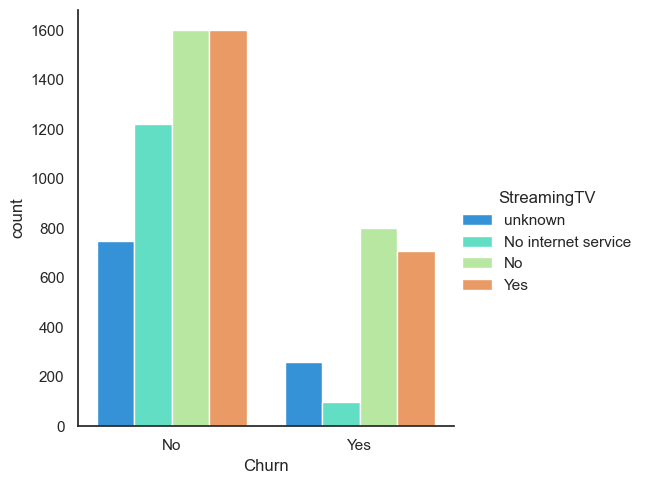

In [59]:
sns.catplot(x="Churn",kind="count",hue="StreamingTV",palette="rainbow",data=df)

In [60]:
pd.crosstab(df['Churn'], df['StreamingTV'])

StreamingTV,No,No internet service,Yes,unknown
Churn,,,,
No,1601,1223,1602,748
Yes,802,98,708,261


In [17]:
# Churn No
No = 1601
No_internet = 1223
Yes = 1602
Unknown = 748
Churn_No = No + Yes + Unknown + No_internet
n_Churn = No / Churn_No * 100
y_Churn = Yes / Churn_No * 100
U_Churn = Unknown / Churn_No * 100
No_int_Churn = No_internet / Churn_No * 100

print(f"di Churn No vs StreamingTV")

print(f"from total {Churn_No} customers, percentage not subscribed to tech support {n_Churn}%")
print(f"of the total {Churn_No} customers, the percentage of not having internet service is {No_int_Churn}%")
print(f"from total {Churn_No} customers, tech support subscription percentage {y_Churn}%")
print(f"out of the total {Churn_No} customers, the percentage of unknowns is {U_Churn}%")
total = n_Churn + y_Churn + U_Churn + No_int_Churn
print(total,'%')

di Churn No vs StreamingTV
from total 5174 customers, percentage not subscribed to tech support 30.943177425589486%
of the total 5174 customers, the percentage of not having internet service is 23.637417858523385%
from total 5174 customers, tech support subscription percentage 30.962504831851568%
out of the total 5174 customers, the percentage of unknowns is 14.456899884035563%
100.0 %


In [18]:
# Churn Yes
No = 802
No_internet = 98
Yes = 708
Unknown = 261
Churn_Yes = No + Yes + Unknown + No_internet
n_Churn = No / Churn_Yes * 100
y_Churn = Yes / Churn_Yes * 100
U_Churn = Unknown / Churn_Yes * 100
No_int_Churn = No_internet / Churn_Yes * 100

print(f"di Churn Yes vs StreamingTV")

print(f"from total {Churn_No} customers, percentage not subscribed to tech support {n_Churn}%")
print(f"of the total {Churn_No} customers, the percentage of not having internet service is {No_int_Churn}%")
print(f"from total {Churn_No} customers, tech support subscription percentage {y_Churn}%")
print(f"out of the total {Churn_No} customers, the percentage of unknowns is {U_Churn}%")
total = n_Churn + y_Churn + U_Churn + No_int_Churn
print(total,'%')

di Churn Yes vs StreamingTV
from total 5174 customers, percentage not subscribed to tech support 42.91064740502943%
of the total 5174 customers, the percentage of not having internet service is 5.2434456928838955%
from total 5174 customers, tech support subscription percentage 37.881219903691814%
out of the total 5174 customers, the percentage of unknowns is 13.964686998394862%
100.0 %


* StreamingTV based on Churn there are various kinds of customers, namely (Yes: Subscribe to StreamingTV; No: No subscription to StreamingTV; No internet service; Unknown: The data is empty)

* Based on Churn with a value of No (Customers who are still subscribed to telco). For Churn subscribers whose value is No, those who are still subscribed to StreamingTV are almost the same as those who are not subscribed to StreamingTV. With the comparison between those who use StreamingTV and those who do not, which is close to 50: 50

* Of the 1869 customers whose Churn value is Yes, the difference between those who subscribe to StreamingTV and those who don't is 94 customers. It is possible that these customers do not know about StreamingTV services

___________________________________

## Churn vs StreamingMovies

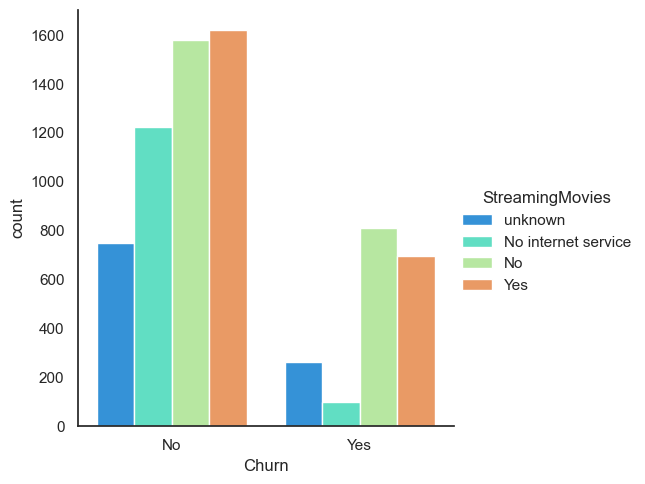

In [63]:
sns.catplot(x="Churn",kind="count",hue="StreamingMovies",palette="rainbow",data=df)

In [64]:
pd.crosstab(df['Churn'], df['StreamingMovies'])

StreamingMovies,No,No internet service,Yes,unknown
Churn,,,,
No,1581,1223,1622,748
Yes,813,98,697,261


In [19]:
# Churn No
No = 1581
No_internet = 1223
Yes = 1662
Unknown = 748
Churn_No = No + Yes + Unknown + No_internet
n_Churn = No / Churn_No * 100
y_Churn = Yes / Churn_No * 100
U_Churn = Unknown / Churn_No * 100
No_int_Churn = No_internet / Churn_No * 100

print(f"di Churn No vs StreamingMovies")

print(f"from total {Churn_No} customers, percentage not subscribed to tech support {n_Churn}%")
print(f"of the total {Churn_No} customers, the percentage of not having internet service is {No_int_Churn}%")
print(f"from total {Churn_No} customers, tech support subscription percentage {y_Churn}%")
print(f"out of the total {Churn_No} customers, the percentage of unknowns is {U_Churn}%")
total = n_Churn + y_Churn + U_Churn + No_int_Churn
print(total,'%')

di Churn No vs StreamingMovies
from total 5214 customers, percentage not subscribed to tech support 30.322209436133484%
of the total 5214 customers, the percentage of not having internet service is 23.456079785193708%
from total 5214 customers, tech support subscription percentage 31.875719217491373%
out of the total 5214 customers, the percentage of unknowns is 14.345991561181433%
100.0 %


In [20]:
# Churn Yes
No = 813
No_internet = 98
Yes = 697
Unknown = 261
Churn_Yes = No + Yes + Unknown + No_internet
n_Churn = No / Churn_Yes * 100
y_Churn = Yes / Churn_Yes * 100
U_Churn = Unknown / Churn_Yes * 100
No_int_Churn = No_internet / Churn_Yes * 100

print(f"di Churn Yes vs StreamingMovies")

print(f"from total {Churn_No} customers, percentage not subscribed to tech support {n_Churn}%")
print(f"of the total {Churn_No} customers, the percentage of not having internet service is {No_int_Churn}%")
print(f"from total {Churn_No} customers, tech support subscription percentage {y_Churn}%")
print(f"out of the total {Churn_No} customers, the percentage of unknowns is {U_Churn}%")
total = n_Churn + y_Churn + U_Churn + No_int_Churn
print(total,'%')

di Churn Yes vs StreamingMovies
from total 5214 customers, percentage not subscribed to tech support 43.4991974317817%
of the total 5214 customers, the percentage of not having internet service is 5.2434456928838955%
from total 5214 customers, tech support subscription percentage 37.29266987693954%
out of the total 5214 customers, the percentage of unknowns is 13.964686998394862%
100.0 %


* StreamingMovies based on Churn there are various kinds of customers, namely (Yes: Subscribe to StreamingMovies; No: No subscription to StreamingMovies; No internet service; Unknown: The data is empty)

* Based on Churn with a value of No (Customers who are still subscribed to telcos). For Churn subscribers whose value is No, those who are still subscribed to StreamingMovies are almost the same as those who are not subscribed to StreamingMovies. With the comparison between those who use StreamingMovies and those who do not, it is close to 50: 50

* Of the 1869 customers whose Churn value is Yes, the difference between those who subscribe to StreamingMovies and those who don't is 116 customers. It is possible that these customers do not know about the StreamingMovies service

________________

## Churn vs Contract

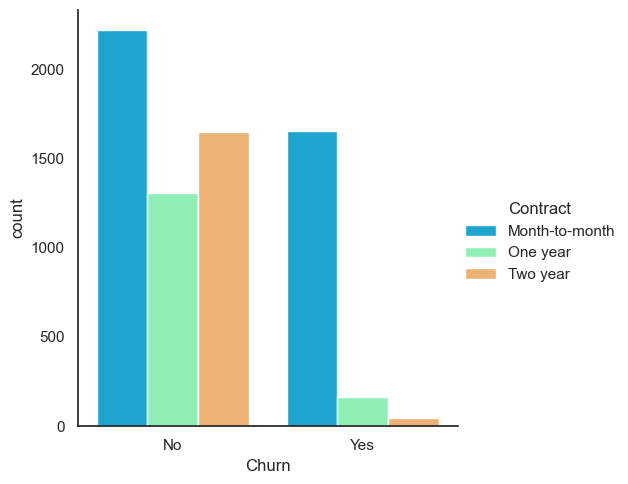

In [67]:
sns.catplot(x="Churn",kind="count",hue="Contract",palette="rainbow",data=df)

In [68]:
pd.crosstab(df['Churn'], df['Contract'])

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1307,1647
Yes,1655,166,48


In [22]:
# Churn No
Month_to_month = 2220
One_year = 1307
Two_year = 1647
Churn = Month_to_month + One_year + Two_year
month_Churn = Month_to_month / Churn * 100
oneyear_Churn = One_year / Churn * 100
twoyear_Churn = Two_year / Churn * 100

print(f"di Churn No vs Contract")

print(f"of total {Churn} customers, month to month percentage is {month_Churn}")
print(f"of total {Churn} customers, one year percentage is {oneyear_Churn}")
print(f"of total {Churn} customers, two year percentage is {twoyear_Churn}")
total = month_Churn + oneyear_Churn + twoyear_Churn
print(total)

di Churn No vs Contract
of total 5174 customers, month to month percentage is 42.906841901816776
of total 5174 customers, one year percentage is 25.260919984538077
of total 5174 customers, two year percentage is 31.83223811364515
100.0


In [23]:
# Churn Yes
Month_to_month = 1655
One_year = 166
Two_year = 48
Churn = Month_to_month + One_year + Two_year
month_Churn = Month_to_month / Churn * 100
oneyear_Churn = One_year / Churn * 100
twoyear_Churn = Two_year / Churn * 100

print(f"di Churn Yes vs Contract")

print(f"of total {Churn} customers, month to month percentage is {month_Churn}")
print(f"of total {Churn} customers, one year percentage is {oneyear_Churn}")
print(f"of total {Churn} customers, two year percentage is {twoyear_Churn}")
total = month_Churn + oneyear_Churn + twoyear_Churn
print(total)

di Churn Yes vs Contract
of total 1869 customers, month to month percentage is 88.55002675227395
of total 1869 customers, one year percentage is 8.881754949170679
of total 1869 customers, two year percentage is 2.568218298555377
100.00000000000001


From Column **Churn vs Contract**

**Churn no** = from a total of 5174, month to month 42% | one year 25% | two years 31%

**Churn yes** = from a total of 1869, month to month 88% | one year 8% | two years 2%

The barchart above shows the Churn amount by Contract category. Judging from the barchart, the number of churn customers is dominated by customers with month-to-month contracts. We think the customer is Churn because he just wants to try it, if the service is bad, the customer doesn't have to worry about extending it because it also costs less, not as much as one year and two years.

**Suggestions, improve service to new customers**

______________________

## Churn vs Papperless Billing

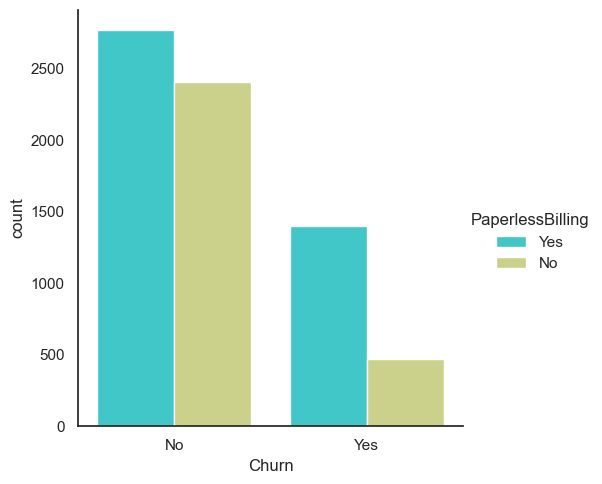

In [71]:
sns.catplot(x="Churn",kind="count",hue="PaperlessBilling",palette="rainbow",data=df)

In [72]:
pd.crosstab(df['Churn'], df['PaperlessBilling'])

PaperlessBilling,No,Yes
Churn,,
No,2403,2771
Yes,469,1400


In [26]:
# Churn No
No = 2403
Yes = 2771
Churn = No + Yes
paperless_No = No / Churn * 100
paperless_Yes = Yes / Churn * 100

print(f"di Churn No vs Paperbilling")

print(f"from total {Churn} customers, Yes percentage is {paperless_No}")
print(f"of total {Churn} customers, percentage No is {paperless_Yes}")
total = paperless_No + paperless_Yes
print(total)

di Churn No vs Paperbilling
from total 5174 customers, Yes percentage is 46.44375724777735
of total 5174 customers, percentage No is 53.55624275222265
100.0


In [25]:
# Churn Yes
No = 469
Yes = 1400
Churn = No + Yes
paperless_No = No / Churn * 100
paperless_Yes = Yes / Churn * 100

print(f"di Churn Yes vs Paperbilling")

print(f"from total {Churn} customers, Yes percentage is {paperless_No}")
print(f"of total {Churn} customers, percentage No is {paperless_Yes}")
total = paperless_No + paperless_Yes
print(total)

di Churn Yes vs Paperbilling
from total 1869 customers, Yes percentage is 25.0936329588015
of total 1869 customers, percentage No is 74.90636704119851
100.0


From Column **Churn vs PaperlessBilling**

**Churn no** = out of a total of 5174, billing without receipts 46% | with 53% receipt

**Churn yes** = from a total of 1869, billing without receipts 25% | with 74% receipt

The barchart above shows the number of Churn based on the PaperlessBilling category. Judging from the barchart, the number of Churn customers who choose not to use paperbilling is more than Churn's customers with PaperlessBilling. Likewise, customers who do not Churn have the same proportion.

____________________________________________

## Churn vs PaymentMethod

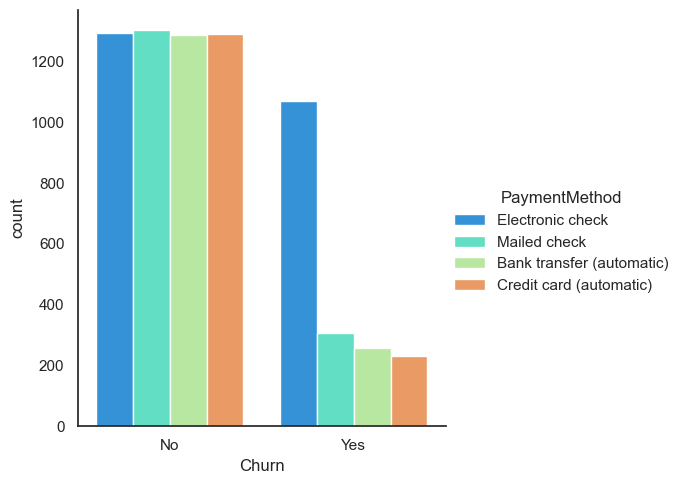

In [75]:
sns.catplot(x="Churn",kind="count",hue="PaymentMethod",palette="rainbow",data=df)

In [76]:
pd.crosstab(df['Churn'], df['PaymentMethod'])

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,1286,1290,1294,1304
Yes,258,232,1071,308


In [27]:
# Churn No
bank_transfer = 1286
credit_card = 1290
electronic_check = 1294
mailed_check = 1304
Churn = bank_transfer + credit_card + electronic_check + mailed_check
transfer_Churn = bank_transfer  / Churn * 100
credit_card_Churn = credit_card / Churn * 100
electronic_Churn = electronic_check / Churn * 100
mailed_churn = mailed_check / Churn * 100

print(f"di Churn No vs PaymentMethod")

print(f"from total {Churn} customers, payment by bank / transfer is {transfer_Churn}")
print(f"from total {Churn} customers, payment using credit is {credit_card_Churn}")
print(f"out of total {Churn} customers, percentage of electronic check is {electronic_Churn}")
print(f"from total {Churn} customers, percentage of emails is {mailed_churn}")
total = transfer_Churn + credit_card_Churn + electronic_Churn + mailed_churn
print(total)

di Churn No vs PaymentMethod
from total 5174 customers, payment by bank / transfer is 24.855044453034402
from total 5174 customers, payment using credit is 24.93235407808272
out of total 5174 customers, percentage of electronic check is 25.00966370313104
from total 5174 customers, percentage of emails is 25.202937765751837
100.0


In [28]:
# Churn Yes
bank_transfer = 258
credit_card = 232
electronic_check = 1071
mailed_check = 308
Churn = bank_transfer + credit_card + electronic_check + mailed_check
transfer_Churn = bank_transfer  / Churn * 100
credit_card_Churn = credit_card / Churn * 100
electronic_Churn = electronic_check / Churn * 100
mailed_churn = mailed_check / Churn * 100

print(f"di Churn No vs PaymentMethod")

print(f"from total {Churn} customers, payment by bank / transfer is {transfer_Churn}")
print(f"from total {Churn} customers, payment using credit is {credit_card_Churn}")
print(f"out of total {Churn} customers, percentage of electronic check is {electronic_Churn}")
print(f"from total {Churn} customers, percentage of emails is {mailed_churn}")
total = transfer_Churn + credit_card_Churn + electronic_Churn + mailed_churn
print(total)

di Churn No vs PaymentMethod
from total 1869 customers, payment by bank / transfer is 13.804173354735152
from total 1869 customers, payment using credit is 12.413055109684324
out of total 1869 customers, percentage of electronic check is 57.30337078651685
from total 1869 customers, percentage of emails is 16.479400749063668
100.0


From Column **Churn vs PaperlessBilling**

**Churn no** = out of a total of 5174, pay by bank 24.8% | with 24.9% credit | with electronic check 25% | by e-mail 25.2%

**Churn yes** = from a total of 1869, pay by bank 13.8% | with 12.9% credit | with electronic check 57% | with email 16.4%

The barchart above shows the Churn amount based on the Payment method category. Judging from the barchart, the number of customers who Churn the most using the Electronic check payment method and Churn the least with the Credit card payment method.

# Feature Engineer

In [79]:
df['Contract'] = df['Contract'].map({"Month-to-month":0,"One year":1,"Two year":2})

In [80]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract              int64
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [81]:
gender_enc = pd.get_dummies(df['gender'], prefix = 'gender', drop_first = True)
sc_enc = pd.get_dummies(df['SeniorCitizen'], prefix = 'SeniorCitizen', drop_first = True)
partner_enc = pd.get_dummies(df['Partner'], prefix = 'Partner', drop_first = True)
depen_enc = pd.get_dummies(df['Dependents'], prefix = 'Dependents', drop_first = True)
ps_enc = pd.get_dummies(df['PhoneService'], prefix = 'PhoneService', drop_first = True)
ml_enc = pd.get_dummies(df['MultipleLines'], prefix = 'MultipleLines', drop_first = True)
is_enc = pd.get_dummies(df['InternetService'], prefix = 'InternetService', drop_first = True)
os_enc = pd.get_dummies(df['OnlineSecurity'], prefix = 'OnlineSecurity', drop_first = True)
ob_enc = pd.get_dummies(df['OnlineBackup'], prefix = 'OnlineBackup', drop_first = True)
dp_enc = pd.get_dummies(df['DeviceProtection'], prefix = 'DeviceProtection', drop_first = True)
ts_enc = pd.get_dummies(df['TechSupport'], prefix = 'TechSupport', drop_first = True)
st_enc = pd.get_dummies(df['StreamingTV'], prefix = 'StreamingTV', drop_first = True)
sm_enc = pd.get_dummies(df['StreamingMovies'], prefix = 'StreamingMovies', drop_first = True)
pb_enc = pd.get_dummies(df['PaperlessBilling'], prefix = 'PaperlessBilling', drop_first = True)
ob_enc = pd.get_dummies(df['PaymentMethod'], prefix = 'PaymentMethod', drop_first = True)
churc_enc = pd.get_dummies(df['Churn'], prefix = 'Churn', drop_first = True)

In [82]:
df=df.drop(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod','Churn'], axis=1)

In [83]:
df

,customerID,tenure,Contract,MonthlyCharges,TotalCharges
0,7590-VHVEG,1,0,29.85,29.85
1,5575-GNVDE,34,1,56.95,1889.50
2,3668-QPYBK,2,0,53.85,108.15
3,7795-CFOCW,45,1,42.30,1840.75
4,9237-HQITU,2,0,70.70,151.65
...,...,...,...,...,...
7038,6840-RESVB,24,1,84.80,1990.50
7039,2234-XADUH,72,1,103.20,7362.90
7040,4801-JZAZL,11,0,29.60,346.45
7041,8361-LTMKD,4,0,74.40,306.60


In [84]:
df=pd.concat([df,gender_enc,sc_enc,partner_enc,depen_enc,ps_enc,ml_enc,is_enc,os_enc,ob_enc,dp_enc,ts_enc,st_enc,sm_enc,pb_enc,ob_enc,churc_enc], axis=1)
df

,customerID,tenure,Contract,MonthlyCharges,TotalCharges,gender_Male,gender_unknown,SeniorCitizen_1.0,SeniorCitizen_unknown,Partner_Yes,...,StreamingTV_Yes,StreamingTV_unknown,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingMovies_unknown,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,1,0,29.85,29.85,0,1,0,1,0,...,0,1,0,0,1,1,0,1,0,0
1,5575-GNVDE,34,1,56.95,1889.50,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,3668-QPYBK,2,0,53.85,108.15,0,1,0,1,0,...,0,1,0,0,1,1,0,0,1,1
3,7795-CFOCW,45,1,42.30,1840.75,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,9237-HQITU,2,0,70.70,151.65,0,1,0,1,0,...,0,1,0,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,84.80,1990.50,1,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0
7039,2234-XADUH,72,1,103.20,7362.90,0,0,0,0,1,...,1,0,0,1,0,1,1,0,0,0
7040,4801-JZAZL,11,0,29.60,346.45,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
7041,8361-LTMKD,4,0,74.40,306.60,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,1


In [85]:
df.dtypes

customerID                                object
tenure                                     int64
Contract                                   int64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                uint8
gender_unknown                             uint8
SeniorCitizen_1.0                          uint8
SeniorCitizen_unknown                      uint8
Partner_Yes                                uint8
Partner_unknown                            uint8
Dependents_Yes                             uint8
Dependents_unknown                         uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
MultipleLines_unknown                      uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
InternetService_unknown                    uint8
OnlineSecurity_No in

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

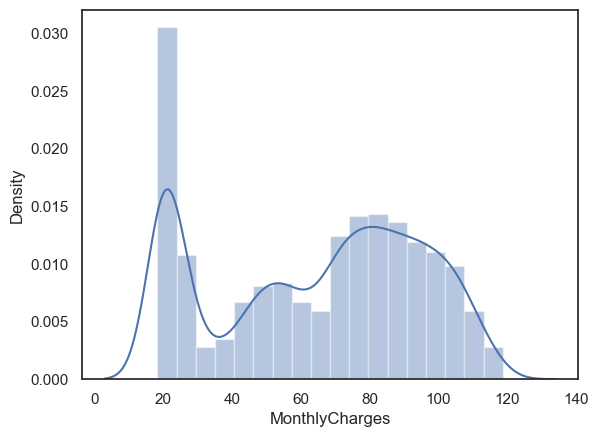

In [86]:
sns.distplot(df["MonthlyCharges"])

<AxesSubplot:xlabel='tenure', ylabel='Density'>

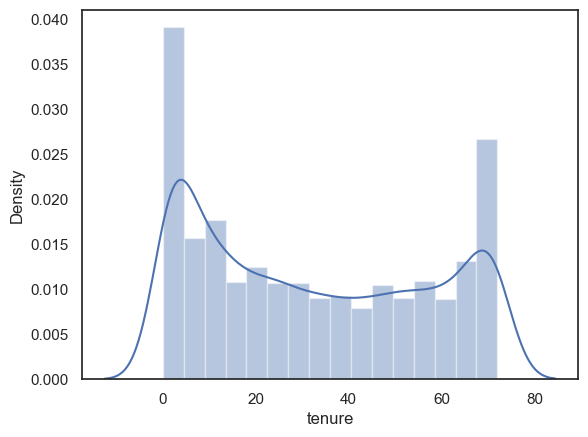

In [87]:
sns.distplot(df["tenure"])

In [88]:
scaler = MinMaxScaler()
df['MonthlyCharges'] = scaler.fit_transform(df[['MonthlyCharges']])

In [89]:
df

,customerID,tenure,Contract,MonthlyCharges,TotalCharges,gender_Male,gender_unknown,SeniorCitizen_1.0,SeniorCitizen_unknown,Partner_Yes,...,StreamingTV_Yes,StreamingTV_unknown,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingMovies_unknown,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,7590-VHVEG,1,0,0.115423,29.85,0,1,0,1,0,...,0,1,0,0,1,1,0,1,0,0
1,5575-GNVDE,34,1,0.385075,1889.50,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,3668-QPYBK,2,0,0.354229,108.15,0,1,0,1,0,...,0,1,0,0,1,1,0,0,1,1
3,7795-CFOCW,45,1,0.239303,1840.75,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,9237-HQITU,2,0,0.521891,151.65,0,1,0,1,0,...,0,1,0,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,0.662189,1990.50,1,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0
7039,2234-XADUH,72,1,0.845274,7362.90,0,0,0,0,1,...,1,0,0,1,0,1,1,0,0,0
7040,4801-JZAZL,11,0,0.112935,346.45,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
7041,8361-LTMKD,4,0,0.558706,306.60,1,0,1,0,1,...,0,0,0,0,0,1,0,0,1,1


# Preprocesing Modeling

## Feature Selection

In [90]:
df=df.drop(['customerID','TotalCharges'], axis=1)
df

,tenure,Contract,MonthlyCharges,gender_Male,gender_unknown,SeniorCitizen_1.0,SeniorCitizen_unknown,Partner_Yes,Partner_unknown,Dependents_Yes,...,StreamingTV_Yes,StreamingTV_unknown,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingMovies_unknown,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,0,0.115423,0,1,0,1,0,1,0,...,0,1,0,0,1,1,0,1,0,0
1,34,1,0.385075,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,2,0,0.354229,0,1,0,1,0,1,0,...,0,1,0,0,1,1,0,0,1,1
3,45,1,0.239303,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,2,0,0.521891,0,1,0,1,0,1,0,...,0,1,0,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,1,0.662189,1,0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,1,0
7039,72,1,0.845274,0,0,0,0,1,0,1,...,1,0,0,1,0,1,1,0,0,0
7040,11,0,0.112935,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
7041,4,0,0.558706,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1


## Feature Importance

In [91]:
X = df.drop(['Churn_Yes'], axis=1)
y = df['Churn_Yes']

In [92]:
#fit the model
model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier()

it is known that there is no feature that has an importance value of less than zero (negative) so it does not need to be taken down. However, there is the OnlineSecurity_No internet service feature which has the smallest importance value.

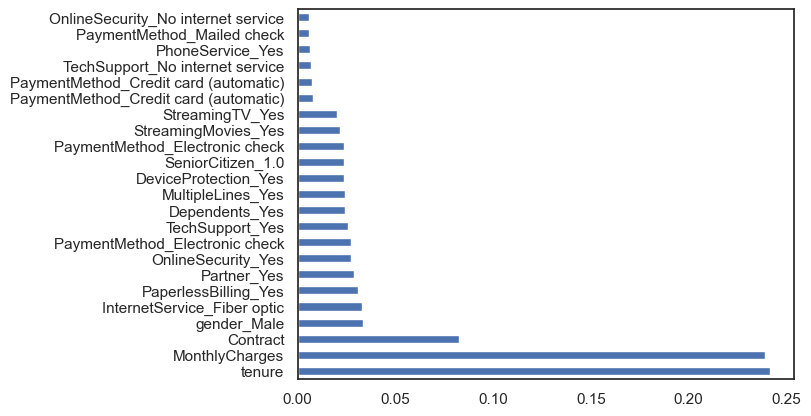

In [93]:
#get importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(23).plot(kind='barh')
plt.show()

# Model Logistic Regression

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

In [95]:
model = LogisticRegression()

In [96]:
model.fit(X_train, y_train)

LogisticRegression()

In [97]:
y_pred= model.predict(X_test)

# Evaluate Model

              precision    recall  f1-score   support

          No       0.86      0.91      0.88      1036
         Yes       0.70      0.58      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



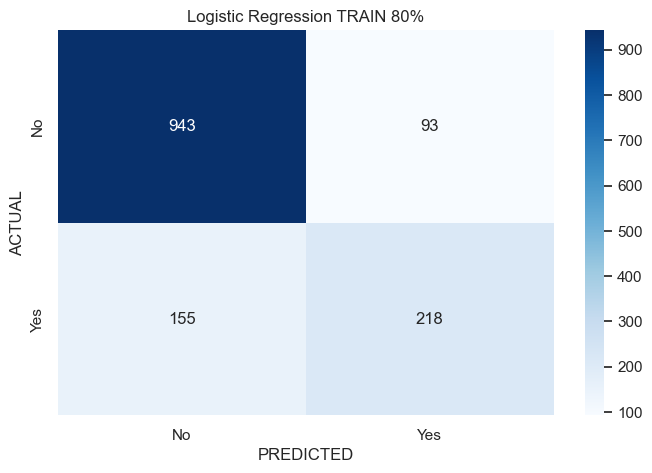

In [99]:
#Churn Yes = 1 No = 0

cm_model=confusion_matrix(y_test, y_pred)
labels = ['No','Yes'] #0, 1

print(classification_report(y_test, y_pred, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_model,annot=True, fmt="0.0f",ax=ax, cmap="Blues")

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

# is the model overvit or underfit ?

In [100]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [101]:
# acuracy train

In [102]:
#accuracy score of training data
print(accuracy_score(y_train, y_pred_train))

0.7997870074547391


In [103]:
# accuracy test

In [104]:
print(accuracy_score(y_test, y_pred_test))

0.8239886444286728


data is not overvit

# AUC ROC

In [105]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_proba_train = model.predict_proba(X_train)[:,1]
y_proba_test = model.predict_proba(X_test)[:,1]
cm_train = confusion_matrix(y_train,y_pred_train)
cm_test = confusion_matrix(y_test,y_pred_test)

In [106]:
fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

In [107]:
# True Positive
tp_train, tp_test = cm_train[1][1], cm_test[1][1]
# True Negative
tn_train, tn_test = cm_train[0][0], cm_test[0][0]
# False Positive
fp_train, fp_test = cm_train[1][0], cm_test[1][0]
# False Negative
fn_train, fn_test = cm_train[0][1], cm_test[0][1]

In [108]:
# Overall, how often is the classifier correct?
accuracy_train, accuracy_test = ((tp_train + tn_train) / (tp_train + tn_train + fp_train + fn_train)), (
            (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test))
# When it's actually yes, how often does it predict yes?
recall_train, recall_test = (tp_train / (tp_train + fp_train)), (tp_test / (tp_test + fp_test))
# When it's actually no, how often does it predict no?
specificity_train, specificity_test = (tn_train / (tn_train + fn_train)), (tn_test / (tn_test + fn_test))
# When it predicts yes, how often is it correct?
precision_train, precision_test = (tp_train / (tp_train + fn_train)), (tp_test / (tp_test + fn_test))
# F1 Score
f1_score_train, f1_score_test = (2 * (precision_train * recall_train) / (precision_train + recall_train)), (
            2 * (precision_test * recall_test) / (precision_test + recall_test))

In [109]:
# Print all the evaluation metrics
print('\nTrain Confusion Matrix')
print(cm_train)
print('Test Confusion Matrix')
print(cm_test)
print('\nArea Under Curve')
print('AUC train & test        : %.2f%%' % (roc_auc_train * 100), '&', '%.2f%%' % (roc_auc_test * 100))
print('\nConfusion Matrix Evaluation')
print('Accuracy train & test   : %.2f%%' % (accuracy_train * 100), '&', '%.2f%%' % (accuracy_test * 100))
print('Recall train & test     : %.2f%%' % (recall_train * 100), '&', '%.2f%%' % (recall_test * 100))
print('Specificity train & test: %.2f%%' % (specificity_train * 100), '&', '%.2f%%' % (specificity_test * 100))
print('Precision train & test  : %.2f%%' % (precision_train * 100), '&', '%.2f%%' % (precision_test * 100))
print('F1 Score train & test   : %.2f%%' % (f1_score_train * 100), '&', '%.2f%%' % (f1_score_test * 100))
print('Log Loss train & test   :', round(log_loss(y_train, y_pred_train), 4), '&',
          round(log_loss(y_test, y_pred_test), 4))


Train Confusion Matrix
[[3728  410]
 [ 718  778]]
Test Confusion Matrix
[[943  93]
 [155 218]]

Area Under Curve
AUC train & test        : 83.86% & 86.06%

Confusion Matrix Evaluation
Accuracy train & test   : 79.98% & 82.40%
Recall train & test     : 52.01% & 58.45%
Specificity train & test: 90.09% & 91.02%
Precision train & test  : 65.49% & 70.10%
F1 Score train & test   : 57.97% & 63.74%
Log Loss train & test   : 6.9152 & 6.0793


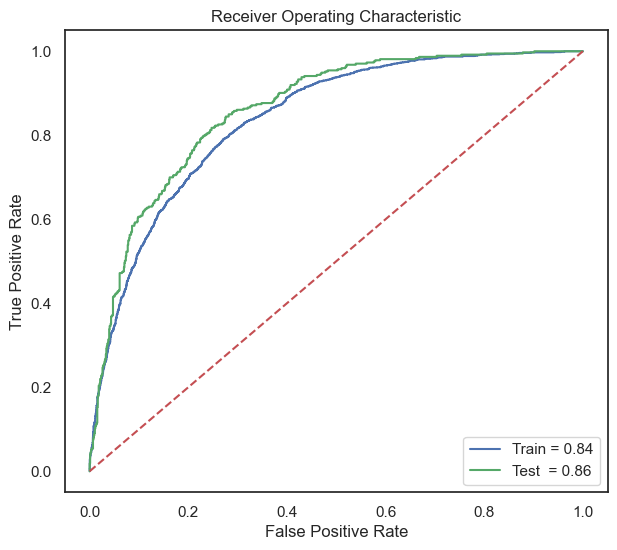

In [110]:
#create plot of ROC_AUC
plt.figure(figsize=(7, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_train, tpr_train, 'b', label='Train = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'g', label='Test  = %0.2f' % roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Building a Moodel With Cross Validation

In [111]:
new_model = LogisticRegression()

In [112]:
score = cross_val_score(new_model, X_train, y_train, scoring="accuracy", cv = 3)

In [113]:
score

array([0.79339723, 0.79605964, 0.79818956])

# Hyper parameter

* model with best param

In [114]:
new_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [115]:
parameters = {"penalty": ['l1', 'l2', 'elasticnet', 'none'],
              "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              "n_jobs": [None, -1],
              "max_iter": [10, 100, 1000]
             }

In [116]:
grid = GridSearchCV(estimator=model, param_grid=parameters, cv=3)

In [117]:
best_model = grid.fit(X_train, y_train)

* get best param

In [118]:
best_model.best_params_

{'max_iter': 100, 'n_jobs': None, 'penalty': 'none', 'solver': 'lbfgs'}

# Evaluate Model

* building a model with hyper tuning

In [128]:
model_new = LogisticRegression(max_iter = 100, n_jobs = None, penalty = 'none', solver = 'lbfgs') # tanya penalty

In [129]:
model_new.fit(X_train, y_train)

LogisticRegression(penalty='none')

In [130]:
y_pred_new = model_new.predict(X_test)

              precision    recall  f1-score   support

          No       0.86      0.91      0.88      1036
         Yes       0.70      0.58      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



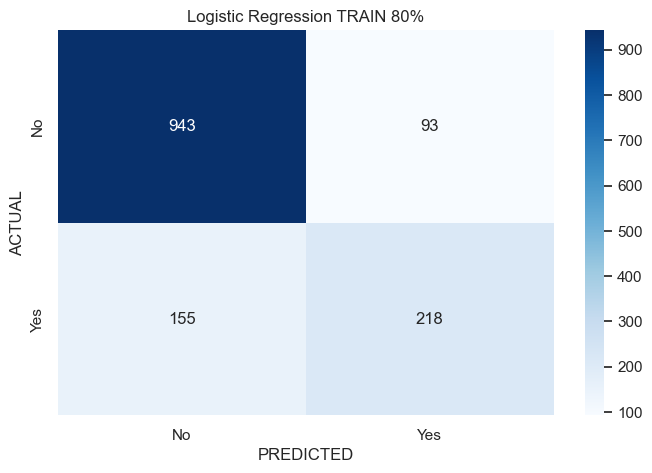

In [131]:
#Churn Yes = 1 No = 0

cm_model=confusion_matrix(y_test, y_pred)
labels = ['No','Yes'] #0, 1

print(classification_report(y_test, y_pred, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_model,annot=True, fmt="0.0f",ax=ax, cmap="Blues")

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

              precision    recall  f1-score   support

          No       0.86      0.91      0.88      1036
         Yes       0.70      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



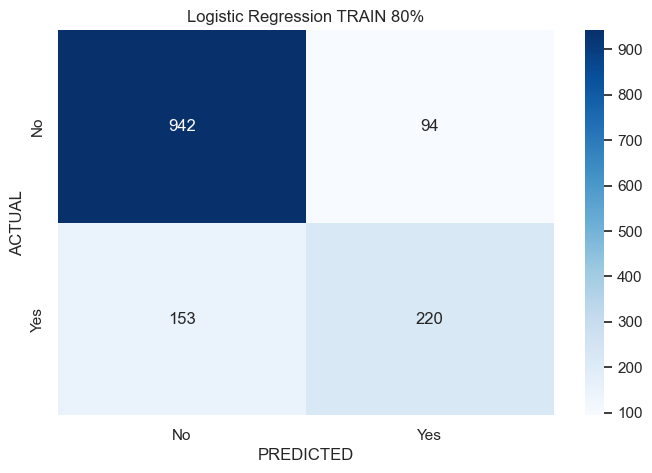

In [132]:
#Churn Yes = 1 No = 0

cm_model=confusion_matrix(y_test, y_pred_new)
labels = ['No','Yes'] #0, 1

print(classification_report(y_test, y_pred_new, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_model,annot=True, fmt="0.0f",ax=ax, cmap="Blues")

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

In [139]:
y_pred_new_train = model_new.predict(X_train)
y_pred_new_test = model_new.predict(X_test)

In [140]:
print(accuracy_score(y_train, y_pred_new_train))

0.7996095136670217


In [141]:
print(accuracy_score(y_test, y_pred_new_test))

0.8246983676366217


# Oversampling with SMOTE

In [142]:
# Oversampling with SMOTE
X_train_sm, y_train_sm = SMOTE(random_state = False).fit_resample(X_train, y_train)

In [143]:
# model oversampled

model_sm = LogisticRegression()
model_sm.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [144]:
# Predict using Logistic regression oversample

y_pred_sm = model_sm.predict(X_test)

              precision    recall  f1-score   support

          No       0.91      0.74      0.81      1036
         Yes       0.52      0.79      0.63       373

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



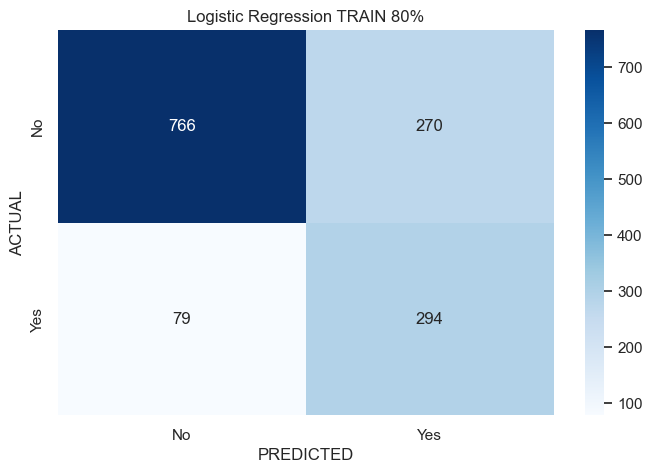

In [145]:
#Churn Yes = 1 No = 0

cm_model=confusion_matrix(y_test, y_pred_sm)
labels = ['No','Yes'] #0, 1

print(classification_report(y_test, y_pred_sm, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_model,annot=True, fmt="0.0f",ax=ax, cmap="Blues")

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

# Is the model overfit or underfit?

In [146]:
y_pred_train_sm = model_sm.predict(X_train_sm)
y_pred_test_sm = model_sm.predict(X_test)

In [147]:
#accuracy score of training data
print(accuracy_score(y_train_sm, y_pred_train_sm))

0.7861285645239247


In [148]:
#accuracy score of testing data
print(accuracy_score(y_test, y_pred_test_sm))

0.752306600425834


## Result

**How Many Customer Churn?**

From a total of 7043 customers :
* 73.46% No churn
* 26.54% Churn

**How Many Customer Female and Male?** :

Not Churn = from a total of 5174, female as much as 42%, male as much as 43%, unknown 14%

Churn = from a total of 1869 customer churn, female as much as 43%, male as much as 42%, Unknown 13%

**How many customer Churn, who has a partner, has dependent or not, and old age or not**?
* **Partners**:

Out of a total of 1869 customer churn :

customer has no partner as much as 55%, customer who has a partner 30%, unknown 13%

* **Dependent**:

Out of a total of 1869 customers churn :

customer has no dependents as much as 70%, customer have a dependent 15%, unknown 13%

* **Senior Citizens** :

Out of the total 1869 customer churn :

non-elderly customers as much as 64%, elderly customers as much as 21%, Unknown 13%

**How many Churn customers used additional service**

* **Telephone Service**:

Out of a total of 1869 customer churn :

91% of customers used Telephone Service, 9% not used Telephone Service

* **Multiple Lines**:

of a total of 1869, subscribed to Multiple Lines 39% | unsubscribed Multiple Lines 39% | do not have telephone service by 8% | customers whose data is unknown 14%

* **Internet services**:

of 1869 total, 22% DSL subscription | 59% Fiber Optic subscription | don't subscribe to internet service by 5% | unknown data 14%


* **Online Backup**

Of the 1869 customers whose Churn is Yes, as many as 57% of customers do not subscribe to Online Backup. Maybe they don't know the Online Backup feature. as much as 5.2% do not have an internet connection. A total of 23.7% subscribed and 13.4% unknown status.

* **Device Protection**

Of the 1869 customers whose Churn is Yes, as many as 55% of customers do not subscribe to Device Protection. Maybe you don't know the device protection feature. as much as 5.2% do not have an internet connection. A total of 24.9% subscribed and 13% unknown status.

* **TechSupport**

Of the 1869 customers whose Churn is Yes, as many as 66% of customers have not done Tech Support. Probably those customers found several technical issues and was not able to resolve by them self.

* **StreamingTV**

not using their internet service for streaming tv 43%, do not have internet service by 5.2%, subscribe to tech support 37.2, unknowns of 13.9%

* **StreamingMovies**

not using their internet service for streaming movies 43.4%, do not have internet service by 5.2%, subscribe to tech support 37.2%, unknowns of 13.96%

* **Papperless Billing**

of a total of 1869, billing without receipts 25%, with 74% receipt

**How long customer churn used service who has churn**

from a total of 1869 costumer who churn, use month to month 88% | one year 8% | two years 2%

**5 feature or facility that influenced customer to churn most**. 

based on feature or variable importance, we obtaine the following ordered by the most likely influencing customer to churn, that is :  
        
        1. tenure, 
        
        2. monthly charge
        
        3. contract
        
        4. gender male, and
        
        5. fiber optic


* **Machine Learning**

From the third model that has been tried/done, the best model with the highest accuracy is the With CV and Hyperparameter Tuning model with training data accuracy of 79.9%, and testing data of 82.3%

## Action / Recommendation

**Suggestions for facilities** :

* recommendations for FiberOptic,

the cost is reduced, many customers we find it difficult to continue the payment service rental fee

* recommendations for Online Security,

promote again about the importance of security when surfing the internet

* recommendations for OnlineBackup,

more promotion about OnlineBackup, because it is important if data is lost

* recommendations for Contracts,

Don't underestimate month-to-month customers. maybe the costs incurred by month-to-month customers are not as big as one year and two years, but from the demand side, month-to-month company users are the most. keep the quality so that customers stay